In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import sys
%matplotlib inline


## 경사하강법 아달린

## 매개변수 :

    eta : float = 학습률 (0.0 ~ 1.0)
    n_iter : int = 훈련 데이터셋 반복 횟수
    random_state =  가중치 무작위 초기화를 위한 난수 생성기 시드
    

    X : {array-like}, shape = {n_samples, n_features}
    (n_samples 개의 샘플과 n_features개의 특성으로 이루어진 훈련데이터)

    # 꽃받침 0 , 꽃받침 길이 2  호출
      
    y : array-like, shape = [n_samples](타깃값) =   부채붓꽃이라면 -1, 아니면 1 로 출력
    
## 속성

    w_ : 1d-array = 학습된 가중치
    
    cost_ : list / 에포크마다 누적된 비용 함수의 제곱합

    log(cost_) = 그레디언트 ( 편미분된 비용함수 )
    
### 코멘트    
    
    1.가중치 w_ 는 
    
    무작위 난수초기화 후,
    y - output = error , 
    
    w_ ( 최종값의 정답의 차 ( eta * error.sum()) / X * 에러 ) 
    
    2.최종값의 루트 = X * ( X * 에러) +  error.sum() 
    
    3. 최종값의 루트가 양수면 1 , 음수면 -1 ( 계단함수) 이 값을 a 라고 가정하면
        return a 
    
### 확률적 경사하강법 ( 학습률을 찾아라 ) 

     학습률이 0.1 이면 비용함수는 증가함 = 경사하강법의 최적의 비용함수를 찾을수 없음
     반대로 학습률이 0.0001 일경우 비용함수 작아짐 ( 미분됨) 비용함수의 최솟값을 ( 우리가 원하는 답 ) 을 찾을 수 있다.
     우리는 비용함수 argmin 의 학습률이 몃번해야하는지 알아야한다.

### 최적의 학습률을 찾고 eta_final = 최적의 학습률 
    
    eta_final 과 다시 fit() 하여 predict() 에 net_input() 대입

## 확률적 경사하강법 아달린

퍼셉트론 / 아달린 / 로지스틱 / ?? / << 범위만 중간까지 

다층신경망 / 순전파 / 경사하강법 / 오차역전파 ~ 14W = 기말 



In [40]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) 
        
        
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            
            net_input = self.net_input(X) # -> X 
            output = self.activation(net_input) 
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## 아달린 



Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'log(SQE)')

Text(0.5, 1.0, ' Adaline eta = 0.01')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'log(SQE)')

Text(0.5, 1.0, ' Adaline eta = 0.001')

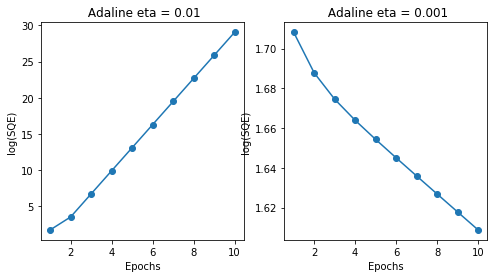

In [54]:

if __name__ == '__main__':
    
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' , header = None)
    y = df.iloc[0:100, 4].values
    y = np.where( y == 'Iris-setosa', -1 , 1 )
    X = df.iloc[0:100 , [0,2] ].values 
    
    fig , ax = plt.subplots( nrows = 1 , ncols = 2 , figsize=(8,4))
    
    adal = AdalineGD( eta=0.01 , n_iter=10).fit(X,y)
    ax[0].plot( range(1, len(adal.cost_) +1 ) , np.log10(adal.cost_) , marker='o')
    # len(adal.cost_) +1  = 비용함수 /  np.log10(adal.cost_) = 그레디언트 
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('log(SQE)')
    ax[0].set_title(' Adaline eta = 0.01')
    
    adal_2 = AdalineGD( eta=0.0001 , n_iter=10).fit(X,y)
    ax[1].plot( range(1, len(adal_2.cost_) +1 ) , np.log10(adal_2.cost_) , marker='o')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('log(SQE)')
    ax[1].set_title(' Adaline eta = 0.001')

    
    # eta = 100 , n_tier = 100  , J(w) 을 찾음. 

### 코멘트 

#### net_input  - X 에 대한 X,W 내적

    - errors 곱셉을 가능하게 해줌 
    
#### 활성화함수 : 반환의 기준 수치 X 그대로 리턴 

    

#### predict 계단함수 : X 가 양수면 1 , 음수면 -1

#### fit()  

가중치를 표준분포 랜덤 초기화 하고, 학습 데이터를 사용하여, activation까지 진행한 output값으로, 정답과의 차를 구하여, 방향을 정한 후, 그 방향과 학습률에 맞게 가중치를 재정의 합니다.(모든 계산에 있어, 이렇듯 단순하게 그라이던트를 알아내어 일정하게 가중치를 변경하는 방식을 배치 경사 하강법이라 합니다.)
            
####  학습률이 0.1 이면 비용함수는 증가함 = 경사하강법의 최적의 비용함수를 찾을수 없음
#### 반대로 학습률이 0.0001 일경우 비용함수 작아짐 ( 미분됨) 비용함수의 최솟값을 ( 우리가 원하는 답 ) 을 찾을 수 있다.
#### 우리는 편미분(그레디언트)  argmin 의 학습률이 몃번해야하는지 알아야한다.

= J(W) 이거를 찾는게 경사하강법의 목표 

In [34]:
# class AdalineGD_2(object):

#     def __init__(self, eta=0.01, n_iter=50, shuffle = True, random_state=None): #생성자
#         self.eta = eta
#         self.n_iter = n_iter
#         self.w_initialized = False
#         self.shuffle = shuffle
#         self.random_state = random_state
        
#     def fit(self, X, y): #가중치 초기화를 하고 학습
#         self._initialize_weights(X.shape[1])
#         self.cost_ = []
#         for i in range(self.n_iter):
#             if self.shuffle:
#                 X, y = self._shuffle(X,y)
#             cost = []
#             for xi, target in zip(X, y):
#                 cost.append(self._update_weights(xi, target))
#             avg_cost = sum(cost) / len(y)
#             self.cost_.append(avg_cost)
#         return self
        
#     def partial_fit(self, X, y): #가중치 초기화를 안하고 학습
#         if not self.w_initialized:
#             self._initialize_weights(S.shape[1])
#         if y.ravel().shape[0] > 1:
#             for xi, target in zip(X, y):
#                 self._update_weights(xi, target)
#         else:
#             self._update_weights(X, y)
#         return self
        
#     def _shuffle(self, X, y): #훈련 데이터를 섞습니다.
#         r = self.rgen.permutation(len(y))
#         return X[r], y[r]
        
#     def _initialize_weights(self, m): #랜덤하게 가중치 초기화
#         self.rgen = np.random.RandomState(self.random_state)
#         self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
#         self.w_initialized = True
        
#     def _update_weights(self, xi, target): #가중치 재설정
#         output = self.activation(self.net_input(xi))
#         error = (target - output)
#         self.w_[1:] += self.eta * xi.dot(error)
#         self.w_[0] += self.eta * error
#         cost = 0.5 * error **2
#         return cost
        
#     def net_input(self, X): #최종 입력값 계산
#         return np.dot(X, self.w_[1:])+ self.w_[0]
        
#     def activation(self, X): #선형 활성화 함수
#         return X
        
#     def predict(self, X): #단위 계단 함수를 이용하여 레이블을 반환합니다.
#         return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

출처 - https://wiserloner.tistory.com/574